Principal Component Analysis (PCA) is a simple dimensionality reduction technique that can capture linear correlations between the features. For a given (standardized) data, PCA can be calculated by eigenvalue decomposition of covariance (or correlation) matrix of the data, or Singular Value Decomposition (SVD) of the data matrix. The data standardization includes mean removal and variance normalization.

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 150
Number of features: 4


To get a feeling for how features (independent variables) are related, let us visualize them via histograms and scatter plots.



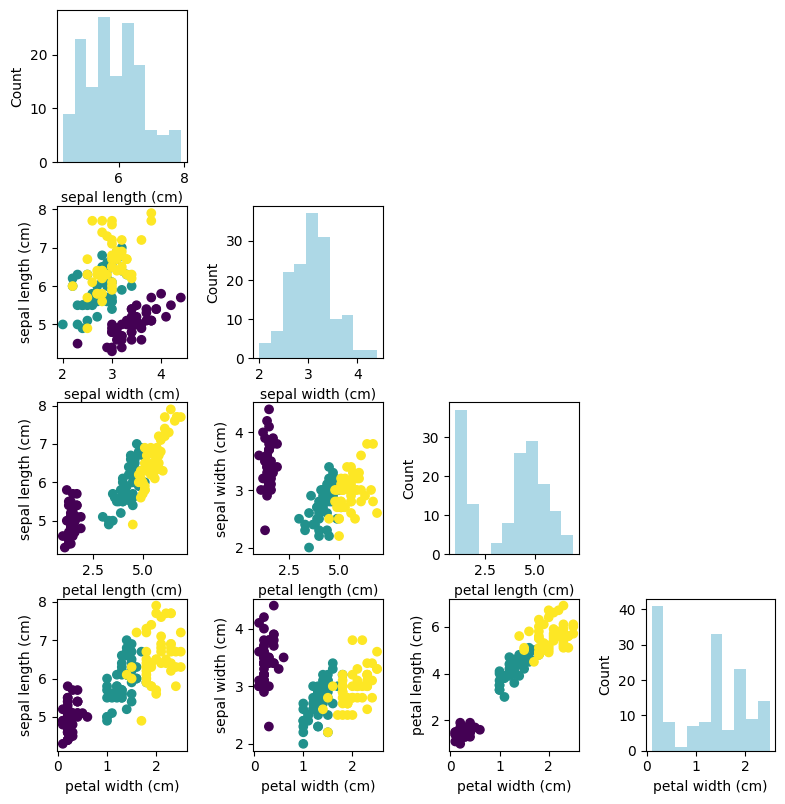

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize= (8, 8))
fig.tight_layout()

names = iris.feature_names

for i, j in zip(*np.triu_indices_from(ax, k=1)):
    ax[j, i].scatter(X[:, j], X[:, i], c = y)
    ax[j, i].set_xlabel(names[j])
    ax[j, i].set_ylabel(names[i])
    ax[i, j].set_axis_off()

for i in range(n_features):
    ax[i, i].hist(X[:, i], color = 'lightblue')
    ax[i, i].set_ylabel('Count')
    ax[i, i].set_xlabel(names[i])

Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained variance ratio:
 [0.72962445 0.22850762]
Cumulative explained variance:
 [0.72962445 0.95813207]
Transformed data shape: (150, 2)


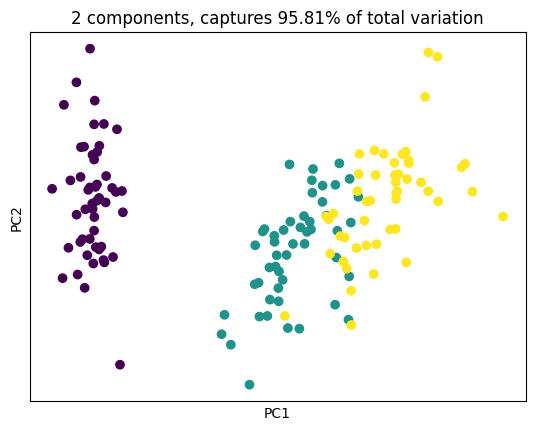

In [12]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_std)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)

X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1].round(4)*100))
plt.show()